  ## Assignment: Multilinear Regression


Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


## Steps:
    Dataset preparation and preprocessing
                (cleaning/imputation,formating,excluding attributes)
    Data transformation- Scaling, normalisation, standardisation
    Dataset splitting:Training dataset, Testing dataset, Validation dataset
    Modeling: Model training, supervised , unsupervised learning
    Model evaluation and testing: Cross -Validation
   

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## Data Preparation and preprocessing

In [3]:
startup=pd.read_csv("c:/users/mahesh/datasetcsv/50_Startups.csv")

In [4]:
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
startup.shape


(50, 5)

In [6]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
startup['State']=startup['State'].astype('category')

In [8]:
startup.dtypes

R&D Spend           float64
Administration      float64
Marketing Spend     float64
State              category
Profit              float64
dtype: object

In [9]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## One Hot Encoding Using pandas

In [10]:
data_encoded=pd.get_dummies(startup)

In [11]:
data_encoded

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [12]:
data_encoded.dtypes

R&D Spend           float64
Administration      float64
Marketing Spend     float64
Profit              float64
State_California      uint8
State_Florida         uint8
State_New York        uint8
dtype: object

## Data Transformation

In [63]:
dn=data_encoded.drop(labels='Profit',axis=1)

In [65]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [66]:
df_norm = norm_func(dn.iloc[:,:])

In [67]:
df_norm

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,1.000000,0.651744,1.000000,0.0,0.0,1.0
1,0.983359,0.761972,0.940893,1.0,0.0,0.0
2,0.927985,0.379579,0.864664,0.0,1.0,0.0
3,0.873136,0.512998,0.812235,0.0,0.0,1.0
4,0.859438,0.305328,0.776136,0.0,1.0,0.0
5,0.797566,0.369448,0.769126,0.0,0.0,1.0
6,0.814128,0.730161,0.270710,1.0,0.0,0.0
7,0.788018,0.717457,0.686493,0.0,1.0,0.0
8,0.729018,0.741733,0.660500,0.0,0.0,1.0
9,0.745906,0.436929,0.646443,1.0,0.0,0.0


In [68]:
df_norm.corr()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,-0.168875,0.205685,-0.033670
State_California,-0.143165,-0.015478,-0.168875,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,-0.515152,-0.492366,1.000000


## Data Visualisation

In [69]:
enumerate(df_norm.columns)

C:\Users\mahesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mahesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mahesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

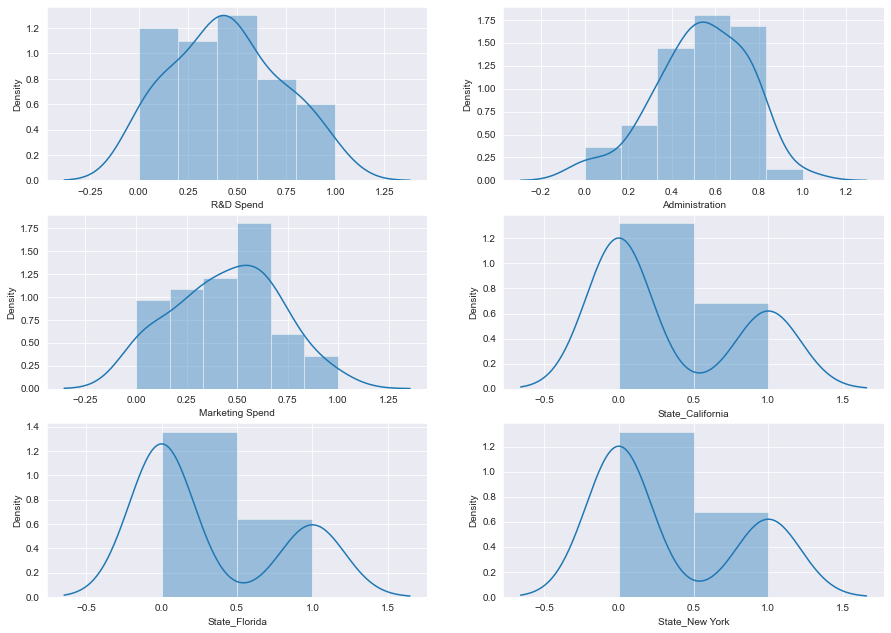

In [70]:
plt.figure(figsize=(15,30))
n=1
for i in enumerate(df_norm.columns):
    plt.subplot(8,2,i[0]+1)
    sns.distplot(df_norm[i[n]])
n=n+1
           

## Scatterplot between variables along with histograms

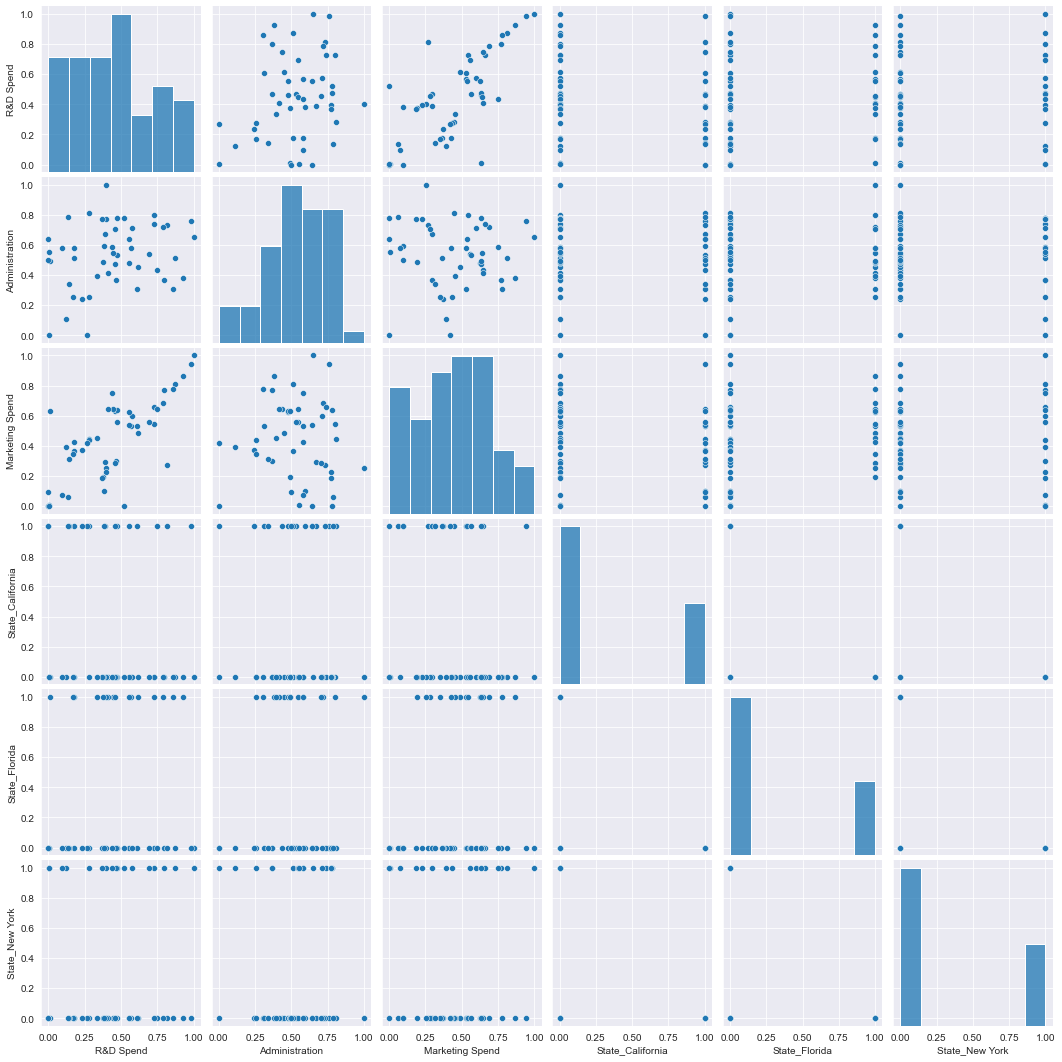

In [75]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df_norm)

In [77]:
df_clean=df_norm.rename( {'Administration':'Admin'}, axis=1)


In [78]:
df_clean=df_clean.rename({'R&D Spend':'Rnd'},axis=1)

In [79]:
df_clean=df_clean.rename({'Marketing Spend':'Mkt'},axis=1)

In [80]:
df_clean=df_clean.rename({'State_New York':'State_NewYork'},axis=1)

In [81]:
df_clean.columns

Index(['Rnd', 'Admin', 'Mkt', 'State_California', 'State_Florida',
       'State_NewYork'],
      dtype='object')

## Building model

In [82]:
df_clean

,Rnd,Admin,Mkt,State_California,State_Florida,State_NewYork
0,1.000000,0.651744,1.000000,0.0,0.0,1.0
1,0.983359,0.761972,0.940893,1.0,0.0,0.0
2,0.927985,0.379579,0.864664,0.0,1.0,0.0
3,0.873136,0.512998,0.812235,0.0,0.0,1.0
4,0.859438,0.305328,0.776136,0.0,1.0,0.0
5,0.797566,0.369448,0.769126,0.0,0.0,1.0
6,0.814128,0.730161,0.270710,1.0,0.0,0.0
7,0.788018,0.717457,0.686493,0.0,1.0,0.0
8,0.729018,0.741733,0.660500,0.0,0.0,1.0
9,0.745906,0.436929,0.646443,1.0,0.0,0.0


In [86]:
df_clean['Profit']=data_encoded['Profit']

In [87]:
df_clean

,Rnd,Admin,Mkt,State_California,State_Florida,State_NewYork,Profit
0,1.000000,0.651744,1.000000,0.0,0.0,1.0,192261.83
1,0.983359,0.761972,0.940893,1.0,0.0,0.0,191792.06
2,0.927985,0.379579,0.864664,0.0,1.0,0.0,191050.39
3,0.873136,0.512998,0.812235,0.0,0.0,1.0,182901.99
4,0.859438,0.305328,0.776136,0.0,1.0,0.0,166187.94
5,0.797566,0.369448,0.769126,0.0,0.0,1.0,156991.12
6,0.814128,0.730161,0.270710,1.0,0.0,0.0,156122.51
7,0.788018,0.717457,0.686493,0.0,1.0,0.0,155752.60
8,0.729018,0.741733,0.660500,0.0,0.0,1.0,152211.77
9,0.745906,0.436929,0.646443,1.0,0.0,0.0,149759.96


In [88]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~Rnd+Admin+Mkt+State_California+State_Florida +State_NewYork',data=df_clean).fit()

In [89]:
#Coefficients
model.params

Intercept            36594.583591
Rnd                 133275.277035
Admin                -3547.352770
Mkt                  12728.669456
State_California     12145.893939
State_Florida        12344.682732
State_NewYork        12104.006920
dtype: float64

## Regression assumption diagnostics 

In [90]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [29]:
# Calculating VIF  for checking multicolinearity 

In [91]:
rsq_Rnd = smf.ols('Rnd~Admin+Mkt+State_California+State_Florida +State_NewYork',data=df_clean).fit().rsquared  
vif_Rnd = 1/(1-rsq_Rnd)

rsq_Admin = smf.ols('Admin~Rnd+Mkt+State_California+State_Florida +State_NewYork',data=df_clean).fit().rsquared  
vif_Admin = 1/(1-rsq_Admin)

rsq_Mkt = smf.ols('Mkt~Rnd+Admin+State_California+State_Florida +State_NewYork',data=df_clean).fit().rsquared  
vif_Mkt = 1/(1-rsq_Mkt)

rsq_State_California = smf.ols('State_California~Rnd+Admin+Mkt+State_Florida +State_NewYork',data=df_clean).fit().rsquared  
vif_State_California = 1/(1-rsq_State_California)

rsq_State_Florida = smf.ols('State_Florida ~ Rnd+Admin+Mkt+State_California+State_NewYork',data=df_clean).fit().rsquared  
vif_State_Florida = 1/(1-rsq_State_Florida)

rsq_State_NewYork= smf.ols('State_NewYork~Rnd+Admin+Mkt+State_California+State_Florida ',data=df_clean).fit().rsquared  
vif_State_NewYork = 1/(1-rsq_State_NewYork)

rsq_Profit= smf.ols('Profit~State_NewYork+State_California+State_Florida ',data=df_clean).fit().rsquared  
vif_Profit= 1/(1-rsq_Profit)
# Storing vif values in a data frame

d1 = {'Variables':["Rnd","Admin","Mkt","State_California","State_Florida","State_NewYork","Profit state"],'VIF':[vif_Rnd,
                                                vif_Admin,vif_Mkt,vif_State_California,vif_State_Florida,vif_State_NewYork,vif_Profit]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame



<ipython-input-91-f7ab8caa8013>:11: RuntimeWarning: divide by zero encountered in double_scalars
  vif_State_California = 1/(1-rsq_State_California)
<ipython-input-91-f7ab8caa8013>:14: RuntimeWarning: divide by zero encountered in double_scalars
  vif_State_Florida = 1/(1-rsq_State_Florida)
<ipython-input-91-f7ab8caa8013>:17: RuntimeWarning: divide by zero encountered in double_scalars
  vif_State_NewYork = 1/(1-rsq_State_NewYork)


,Variables,VIF
0,Rnd,2.495511
1,Admin,1.177766
2,Mkt,2.416797
3,State_California,inf
4,State_Florida,inf
5,State_NewYork,inf
6,Profit state,1.024459


## Table containing R^2 value for each prepared model

In [95]:
d2 = {'Variables':["Rnd","Admin","Mkt","State_California","State_Florida","State_NewYork","Profit_state"],'R^2':[rsq_Rnd,
                                                rsq_Admin,rsq_Mkt,rsq_State_California,rsq_State_Florida,rsq_State_NewYork,rsq_Profit]}
Rsq_frame = pd.DataFrame(d2)  
Rsq_frame

,Variables,R^2
0,Rnd,0.599280
1,Admin,0.150935
2,Mkt,0.586229
3,State_California,1.000000
4,State_Florida,1.000000
5,State_NewYork,1.000000
6,Profit_state,0.023875


Test for residual normality qq plot 

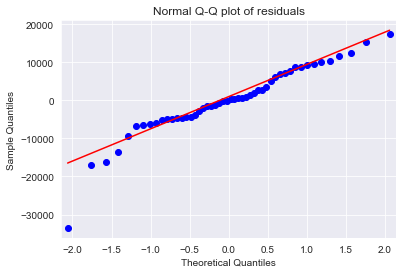

In [96]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [97]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

## Regressor vs residual plots -Homoscadacity

In [98]:
from scipy import stats 
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

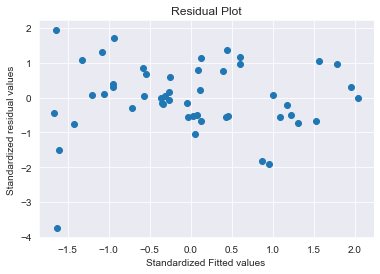

In [100]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

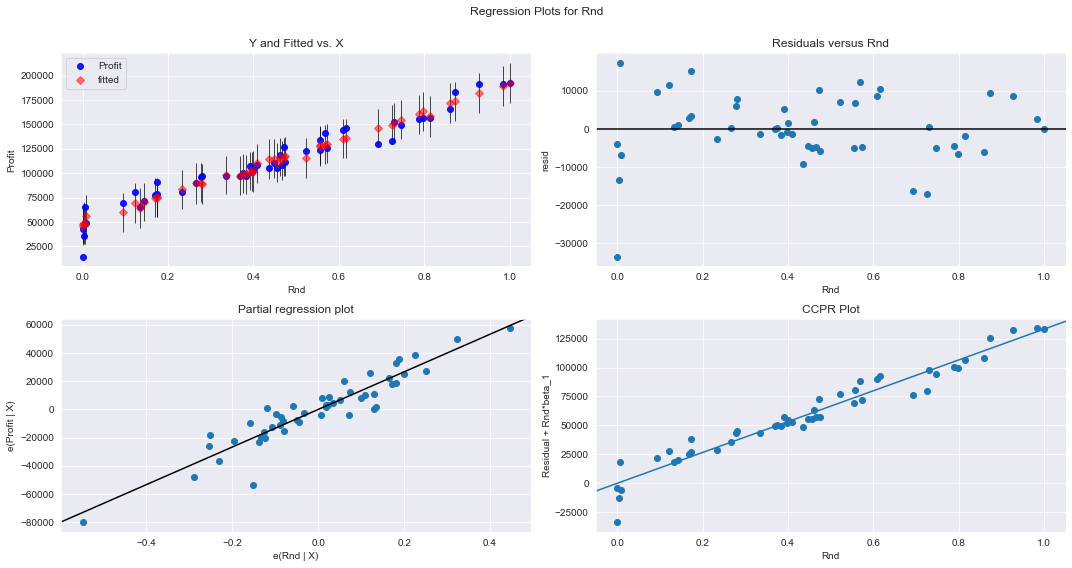

In [101]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Rnd", fig=fig)
plt.show()

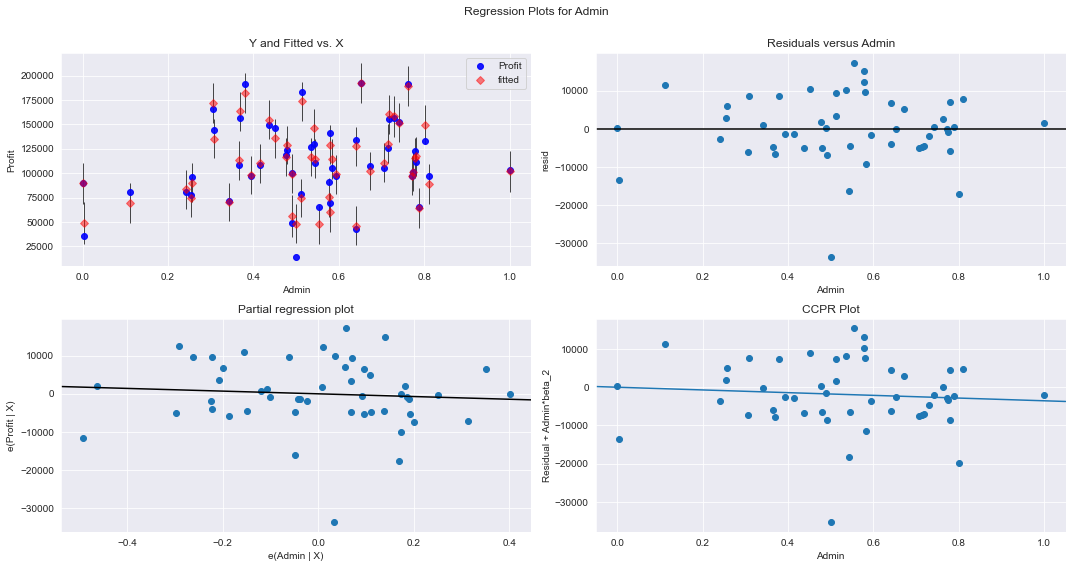

In [102]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Admin", fig=fig)
plt.show()

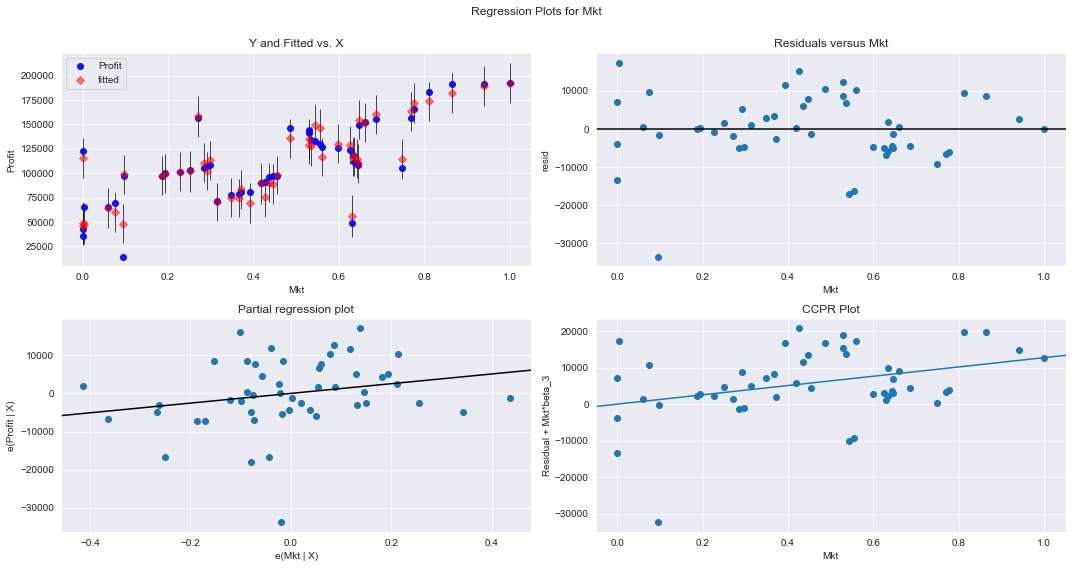

In [103]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Mkt", fig=fig)
plt.show()

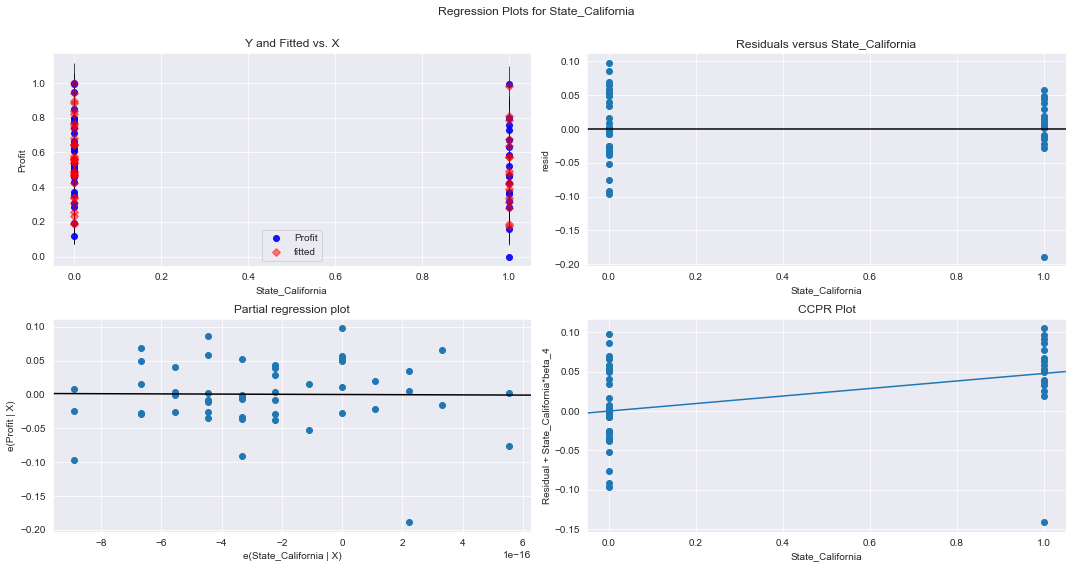

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"State_California", fig=fig)
plt.show()

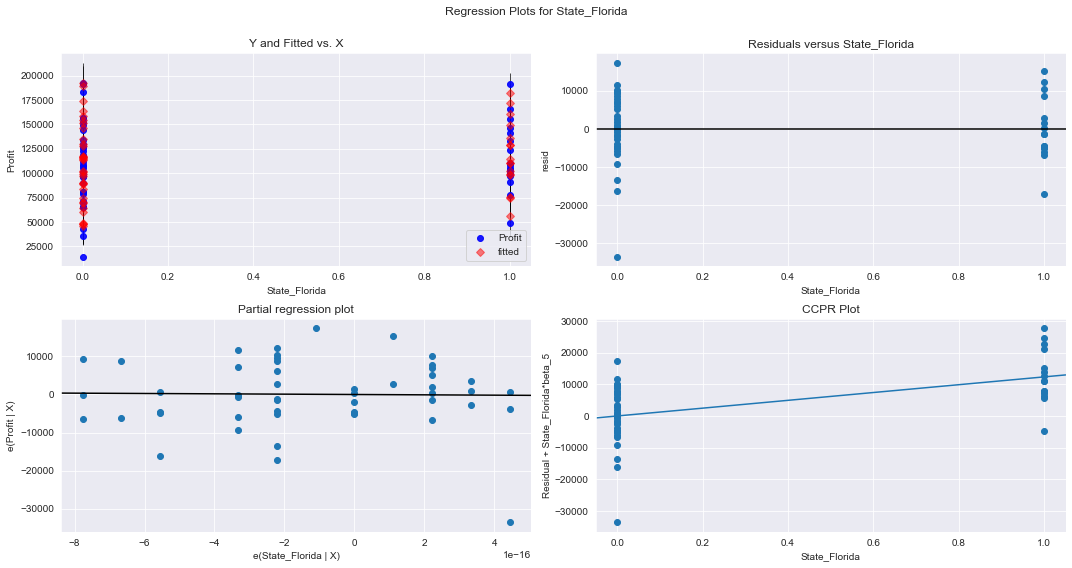

In [104]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"State_Florida", fig=fig)
plt.show()

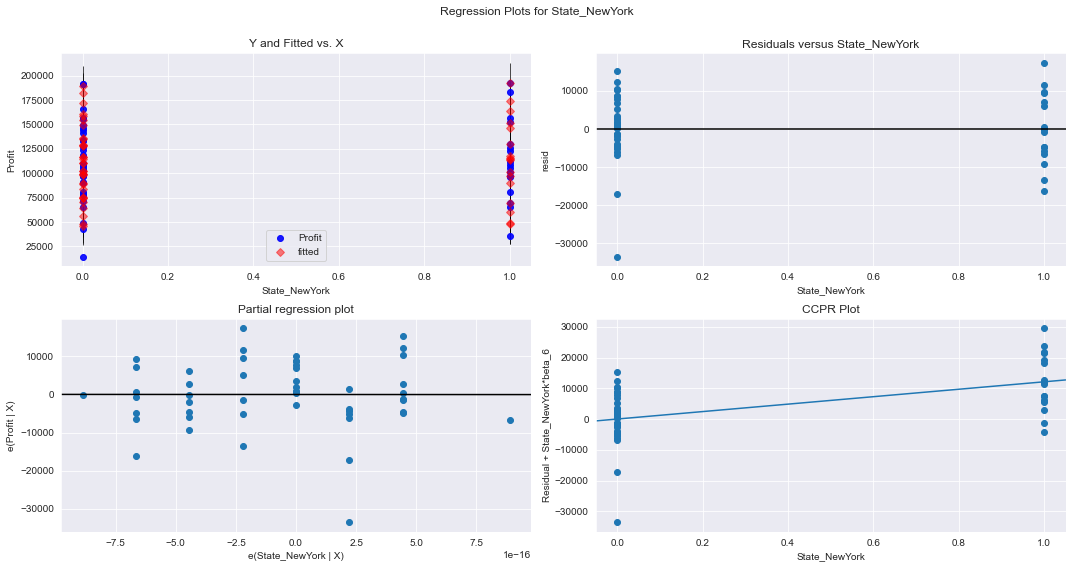

In [106]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"State_NewYork", fig=fig)
plt.show()

## outlier detection boxplot

<AxesSubplot:>

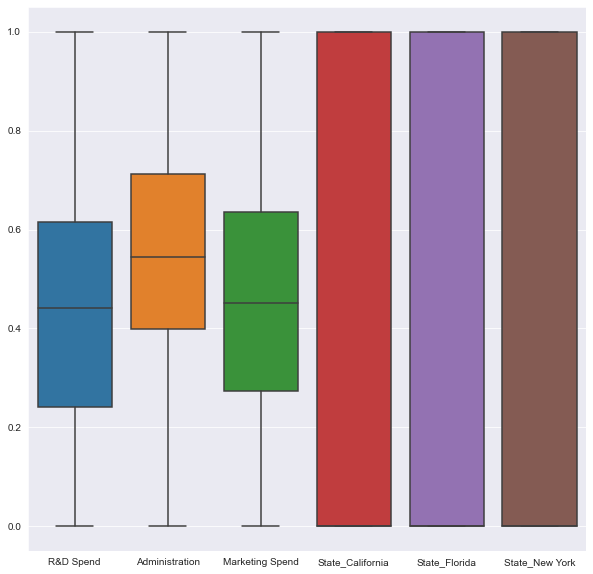

In [109]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_norm)

<AxesSubplot:>

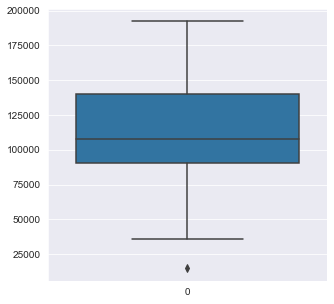

In [111]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df_clean['Profit'])

## Method  of outlier detection  using Cook's distance

In [112]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

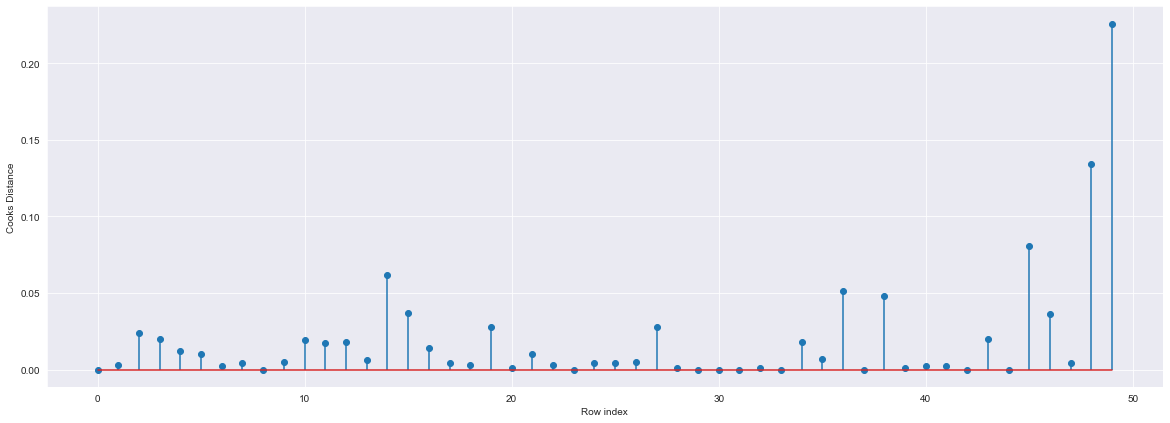

In [113]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df_clean)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [114]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.22625094505673307)

High Influence points

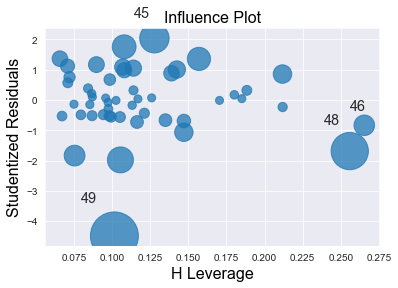

In [115]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [116]:
k = df_clean.shape[1]
n = df_clean.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [117]:
df_clean[df_clean.index.isin([49])]
#index 49 is an outlier

,Rnd,Admin,Mkt,State_California,State_Florida,State_NewYork,Profit
49,0.0,0.500148,0.095749,1.0,0.0,0.0,14681.4


## Data set split  

In [118]:
X =df_clean.drop(labels='Profit',axis=1)
y=df_clean['Profit']

In [119]:
X

,Rnd,Admin,Mkt,State_California,State_Florida,State_NewYork
0,1.000000,0.651744,1.000000,0.0,0.0,1.0
1,0.983359,0.761972,0.940893,1.0,0.0,0.0
2,0.927985,0.379579,0.864664,0.0,1.0,0.0
3,0.873136,0.512998,0.812235,0.0,0.0,1.0
4,0.859438,0.305328,0.776136,0.0,1.0,0.0
5,0.797566,0.369448,0.769126,0.0,0.0,1.0
6,0.814128,0.730161,0.270710,1.0,0.0,0.0
7,0.788018,0.717457,0.686493,0.0,1.0,0.0
8,0.729018,0.741733,0.660500,0.0,0.0,1.0
9,0.745906,0.436929,0.646443,1.0,0.0,0.0


In [120]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [122]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35, 6)
(35,)
(15, 6)
(15,)


In [123]:
X_test

,Rnd,Admin,Mkt,State_California,State_Florida,State_NewYork
38,0.122345,0.111636,0.392690,0.0,0.0,1.0
8,0.729018,0.741733,0.660500,0.0,0.0,1.0
5,0.797566,0.369448,0.769126,0.0,0.0,1.0
11,0.608845,0.308364,0.529362,1.0,0.0,0.0
47,0.000000,0.640547,0.000000,1.0,0.0,0.0
35,0.278284,0.257032,0.435618,0.0,0.0,1.0
46,0.007956,0.491260,0.629768,0.0,1.0,0.0
45,0.006049,0.554724,0.004036,0.0,0.0,1.0
43,0.093776,0.579307,0.075319,0.0,0.0,1.0
30,0.374931,0.489928,0.193163,0.0,1.0,0.0


In [124]:
from sklearn.linear_model import LinearRegression
modelm = LinearRegression()
modelm.fit(X_train,y_train)
y_pred = modelm.predict(X_test)

In [125]:
y_pred

array([ 61371.3392044 , 148800.78209547, 160802.15031261, 136605.51502088,
        43116.64914303,  83562.09596675,  51477.74815269,  38934.14541992,
        52155.78188459,  97845.61999311, 100717.17493119, 171647.66796983,
        95819.44473281, 174063.83409726,  72070.66220212])

In [126]:
print("Coefficients/Slope : \n",modelm.coef_,"\n")
print("Intercepts :\n",modelm.intercept_)

Coefficients/Slope : 
 [141252.06204236  -2571.95844037  12531.98741226   2115.7091533
   1076.85356796  -3192.56272126] 

Intercepts :
 42648.399782077846


In [127]:
df_clean

,Rnd,Admin,Mkt,State_California,State_Florida,State_NewYork,Profit
0,1.000000,0.651744,1.000000,0.0,0.0,1.0,192261.83
1,0.983359,0.761972,0.940893,1.0,0.0,0.0,191792.06
2,0.927985,0.379579,0.864664,0.0,1.0,0.0,191050.39
3,0.873136,0.512998,0.812235,0.0,0.0,1.0,182901.99
4,0.859438,0.305328,0.776136,0.0,1.0,0.0,166187.94
5,0.797566,0.369448,0.769126,0.0,0.0,1.0,156991.12
6,0.814128,0.730161,0.270710,1.0,0.0,0.0,156122.51
7,0.788018,0.717457,0.686493,0.0,1.0,0.0,155752.60
8,0.729018,0.741733,0.660500,0.0,0.0,1.0,152211.77
9,0.745906,0.436929,0.646443,1.0,0.0,0.0,149759.96


## Predicting for new data

In [157]:
#New data for prediction
new_data=pd.DataFrame({'Rnd':0.278284,"Admin":0.257032,"Mkt":0.435618,"State_California":0,"State_Florida":0,"State_NewYork":1},index=[1])

In [158]:
modelm.predict(new_data)

array([83562.10956492])

## Model Evaluation

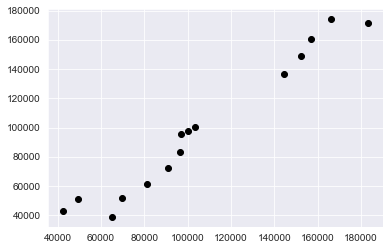

In [144]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,color='black')

In [159]:
#Evaluation Metrics for Regression
from sklearn.metrics import mean_squared_error,r2_score
print(r2_score(y_pred,y_test)) ## R-squared is a statistical measure of how close the data are to the fitted regression line.
print(mean_squared_error(y_pred,y_test))

0.932192540813856
145571006.463365


In [161]:
from sklearn.model_selection import cross_val_score # Training on multiple samples with mentioned cv size to get more confidence
cv_score = cross_val_score(modelm,X_train,y_train,cv=2)
print("CV Score: ", cv_score)
print("Accuracy Mean {} \nAccuracy Variance {}".format(cv_score.mean(),cv_score.std()))


CV Score:  [0.93370928 0.93740417]
Accuracy Mean 0.9355567284682225 
Accuracy Variance 0.0018474438978279828


<AxesSubplot:>

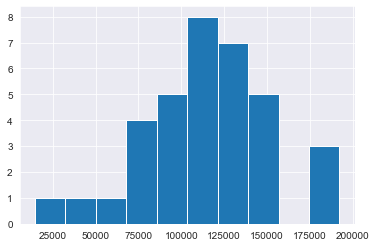

In [163]:
y_train.hist()

<AxesSubplot:>

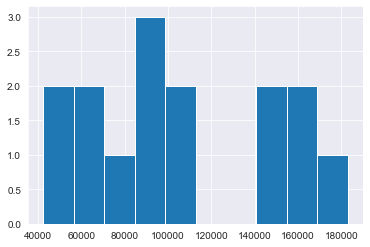

In [171]:
y_test.hist()

In [143]:
(model.rsquared,model.aic)

(0.9507524843355148, 1062.764909597834)

In [168]:
import statsmodels.api as sm
results_1 = sm.OLS(y,X).fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           1.34e-27
Time:                        23:21:34   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Rnd               1.333e+05   7673.355     17.369      0.000    1.18e+05    1.49e+05
Admin            -3547.3528   6861.263     -0.517      0.608   -1.74e+04    1.03e+04
Mkt               1.273e+04   8087.397      1.574      0.123   -3570.409     2.9e+04
State_California  4.874e+04   4665.393     10.447      0.000    3.93e+04    5.81e+04
State_Florida     4.894e+04   5133.445      9.533      0.000    3.86e+04    5.93e+04
State_NewYork      4.87e+04   4789.085     10.169      0.000     3.9e+04    5.84e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Feature Scaling

In [172]:
from sklearn.feature_selection import RFE #Recursive Feature Elimination
# I can use the best 4 parameters - check the accuracy is it impavting with rest 8parameters.
logreg = LinearRegression()
rfe = RFE(logreg,5)
rfe = rfe.fit(X,y)

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True  True]
[1 1 1 2 1 1]


C:\Users\mahesh\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
